# Project: Wrangling and Analyze Data (WeRateDogs)

Godwin Akpa,
* June, 2022

## Context

WeRateDogs is a Twitter account that rates people's dogs with humorous comments about the dog by sharing the dog's images and a brief comment about it.
These ratings almost always have a denominator of 10. The numeratos though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're goid dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage. They have shared 5000+ of their tweets containing some basic data such as their brief comments, the breed if the dog.

### Goal: 
Wrangle WeRateDogs Twitter data to create interesting and trustworthy analysis and visualization.

## Data Gathering
In the cell below, I gathered **all** three pieces of data for this project and loaded them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [19]:
#Import packages
import pandas as pd
import numpy as np
import requests
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as ns
import csv
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer


In [20]:
#Read csv file
archive = pd.read_csv('twitter_archive_enhanced.csv')
archive.head(3)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [21]:
# URL of the file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'


In [22]:
# get file with the image predictions
with open('image_predictions.tsv', 'wb') as file:
          predictions = requests.get(url)
          file.write(predictions.content)
    

In [23]:
# load image predictions 
image = pd.read_csv('image_predictions.tsv', sep='\t')
image.head(3)
                         

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [24]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

"""
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

"""


'\nconsumer_key = \'\'\nconsumer_secret = \'\'\naccess_token = \'\'\naccess_secret = \'\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\ntweet_ids = archive.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n  

In [25]:
data = []
with open('tweet_json.txt') as f:
    for line in f:
        data.append(json.loads(line))
        

In [26]:
tweet = pd.DataFrame(data)
tweet.head(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data
In this section, I detected and documented at least **(8) quality issues and (2) tidiness issue**. I used **both** visual assessment and programmatic assessement to assess the data.


#### Visual Preview

In [27]:
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [28]:
archive.doggo.value_counts()


None     2259
doggo      97
Name: doggo, dtype: int64

In [29]:
archive.floofer.value_counts()


None       2346
floofer      10
Name: floofer, dtype: int64

In [30]:
archive.pupper.value_counts()


None      2099
pupper     257
Name: pupper, dtype: int64

In [14]:
archive.puppo.value_counts()


None     2326
puppo      30
Name: puppo, dtype: int64

In [31]:
archive.text.sample(4)

1744    This is Rubio. He has too much skin. 11/10 htt...
2243    This is Cleopatricia. She is a northern Paperb...
1836    Extremely rare pup here. Very religious. Alway...
270     This is Max. There's no way in h*ck you're tak...
Name: text, dtype: object

In [32]:
image.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [33]:
tweet.head(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


#### Programmatic View

In [34]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [35]:
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [36]:
archive.name.value_counts().head()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Name: name, dtype: int64

In [37]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [38]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [40]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [41]:
tweet.isnull().sum()

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

In [42]:
tweet.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Quality issues

 **archive**
 
1. Archive and tweet tables contain unnecessary columns.

2. Wrong data type for **timestamp** and **tweet_id**.

3. Some dog **names** are wrong


**image**

4. Inconsistent column name for tweet table compared to archive and image table.

5. The types of dogs in columns **p1**, **p2** and **p3** had some uppercase and lower case letters

6. Wrong datatype (**p1_conf**, **p2_conf**, **p3_conf**) and (**p1_dog**, **p2_dog**, **p3_dog**)

**tweet**

7.  Very few values recorded in (**contributors**, **coordinates**, **extended_entities**, **geo**, **place**, **retweeted_status**, and **place**) 

8. Wrong datatype for **tweet_id**.

9. Values in **sources** are not readable.


### Tidiness issues
1. Missing information for dog stage resulting from many instances of 'dog stage' in many columns - archive


2. The tweet, image, and archive table should be merged as they contain related fields 

## Cleaning Data
In this section, I cleaned **all** of the issues I documented while assessing. 

I made a copy of the original data before cleaning.

This includes merging individual pieces of data according to the rules of [tidy data]

I believe the resultant master pandas DataFrames is a high-quality and tidy one.

In [43]:
# Make copies of original pieces of data
archive_copy = archive.copy()
image_copy = image.copy()
tweet_copy = tweet.copy()


### Quality

### Issue #1:  Archive and tweet tables contain unnecessary columns 

#### Define:  Drop unnecessary columns

#### Code

In [44]:
# Cleaning the archive table
archive_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls'], axis=1, inplace=True)

In [45]:
# Cleaning the tweet table
tweet_copy.drop(['in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'possibly_sensitive', 'possibly_sensitive_appealable', 'id'], axis=1, inplace=True)

#### Test

In [46]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(8)
memory usage: 202.5+ KB


In [47]:
tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 20 columns):
contributors          0 non-null object
coordinates           0 non-null object
created_at            2354 non-null object
display_text_range    2354 non-null object
entities              2354 non-null object
extended_entities     2073 non-null object
favorite_count        2354 non-null int64
favorited             2354 non-null bool
full_text             2354 non-null object
geo                   0 non-null object
id_str                2354 non-null object
is_quote_status       2354 non-null bool
lang                  2354 non-null object
place                 1 non-null object
retweet_count         2354 non-null int64
retweeted             2354 non-null bool
retweeted_status      179 non-null object
source                2354 non-null object
truncated             2354 non-null bool
user                  2354 non-null object
dtypes: bool(4), int64(2), object(14)
memory usage: 303.

### Issue #2, #6, #8: **Wrong Datatypes**
> * **archive_copy: timestamp dtype "object"**
> * **archive_copy: tweet_id dtype "int64"**
> * **image_copy: tweet_id dtype "int64"**
> * **image_copy: (p1_conf,p2_conf,p3_conf) dtype "string"**
> * **image_copy: (p1_dog,p2_dog,p3_dog) dtype "string"**

#### Define: 
* In the `archive_copy` table, change the dtype of column **timestamp** from object to datetime using pandas `to_datetime()` function. 
* In the `archive_copy` table, change the dtype of column **tweet_id** from int64 to object using the `astype()` function.
* In the `image_copy` table, change the dtype of column **tweet_id** from int64 to object using the `astype()` function.
* In the `image_copy` table, Convert (p1_conf,p2_conf,p3_conf) from string to float using the `astype()` function.
* In the `image_copy` table, Convert (p1_dog,p2_dog,p3_dog) from string to bool using the `astype()` function.

#### Code

In [48]:
archive_copy['tweet_id'] = archive_copy['tweet_id'].astype('str')
image_copy['tweet_id'] = image_copy['tweet_id'].astype('str')
archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp'])


In [49]:
image_copy[["p1_conf","p2_conf","p3_conf"]] = image_copy[["p1_conf","p2_conf","p3_conf"]].astype(float)
image_copy[["p1_dog","p2_dog","p3_dog"]] = image_copy[["p1_dog","p2_dog","p3_dog"]].astype(bool)


#### Test

In [50]:
print(archive_copy['tweet_id'].dtype) 
print(image_copy['tweet_id'].dtype) 
print(archive_copy['timestamp'].dtype)


object
object
datetime64[ns]


In [51]:
print(image_copy['p1_conf'].dtype)
print(image_copy['p2_conf'].dtype) 
print(image_copy['p3_conf'].dtype) 


float64
float64
float64


In [52]:
print(image_copy['p1_dog'].dtype)
print(image_copy['p2_dog'].dtype) 
print(image_copy['p3_dog'].dtype) 


bool
bool
bool


### Issue #3: Some dog names are wrong

#### Define: Convert wrong names into nan values

#### Code

In [53]:
# check for unique text strings in name
archive_copy[archive_copy.name.str.lower() == archive_copy.name].name.unique()


array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [54]:
# match text to sample tweets
archive_copy[archive_copy.name.str.lower() == archive_copy.name].sample(10).text.tolist()



["This is a brave dog. Excellent free climber. Trying to get closer to God. Not very loyal though. Doesn't bark. 5/10 https://t.co/ODnILTr4QM",
 "C'mon guys. We've been over this. We only rate dogs. This is a cow. Please only submit dogs. Thank you...... 9/10 https://t.co/WjcELNEqN2",
 'Seriously guys?! Only send in dogs. I only rate dogs. This is a baby black bear... 11/10 https://t.co/H7kpabTfLj',
 'What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX',
 "This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF",
 'This is a Trans Siberian Kellogg named Alfonso. Huge ass eyeballs. Actually Dobby from Harry Potter. 7/10 https://t.co/XpseHBlAAb',
 'RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX',
 'Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeaka

In [55]:
# drop wrong name strings
archive_copy['name'] = archive_copy['name'].apply(lambda x: x if str(x).lower() != x else np.nan)



In [56]:
# extract corrected name string
archive_copy[archive_copy.name.str.lower() == archive_copy.name].name.unique()



array([], dtype=object)

#### Test

In [57]:
# corrected name strings
archive_copy.name.unique()


array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', nan, 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 

In [58]:
archive_copy.name.value_counts()

None         745
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
Sadie          8
Toby           7
Bailey         7
Daisy          7
Buddy          7
Dave           6
Oscar          6
Bella          6
Stanley        6
Koda           6
Scout          6
Rusty          6
Leo            6
Milo           6
Jax            6
Jack           6
Sammy          5
Alfie          5
Finn           5
Gus            5
            ... 
Luther         1
Kingsley       1
Hall           1
Moofasa        1
Kona           1
Robin          1
Oreo           1
Carter         1
Pilot          1
Lili           1
Rose           1
Cilantro       1
Trevith        1
Nida           1
Devón          1
Roscoe         1
Dwight         1
Tito           1
Staniel        1
Stephanus      1
Steve          1
Striker        1
BeBe           1
Birf           1
Chubbs         1
Marq           1
Kulet          1
Blipson       

In [59]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2247 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 202.5+ KB


### Issue #4 **Inconsistent Column Names**

* **tweet_copy:** has **id_str** as unique column

#### Define: 
* In the `tweet_copy` table, change the column name **id_str** to **tweet_id** using the `rename()` function.
 

#### Code

In [60]:
tweet_copy.rename(columns={"id_str": "tweet_id"}, inplace=True)
#archive_copy.rename(columns={"floofer": "floof"}, inplace=True)


#### Test

In [61]:
tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 20 columns):
contributors          0 non-null object
coordinates           0 non-null object
created_at            2354 non-null object
display_text_range    2354 non-null object
entities              2354 non-null object
extended_entities     2073 non-null object
favorite_count        2354 non-null int64
favorited             2354 non-null bool
full_text             2354 non-null object
geo                   0 non-null object
tweet_id              2354 non-null object
is_quote_status       2354 non-null bool
lang                  2354 non-null object
place                 1 non-null object
retweet_count         2354 non-null int64
retweeted             2354 non-null bool
retweeted_status      179 non-null object
source                2354 non-null object
truncated             2354 non-null bool
user                  2354 non-null object
dtypes: bool(4), int64(2), object(14)
memory usage: 303.

In [62]:
# isolating null colums. with null records
tweet_copy.isnull().sum()

contributors          2354
coordinates           2354
created_at               0
display_text_range       0
entities                 0
extended_entities      281
favorite_count           0
favorited                0
full_text                0
geo                   2354
tweet_id                 0
is_quote_status          0
lang                     0
place                 2353
retweet_count            0
retweeted                0
retweeted_status      2175
source                   0
truncated                0
user                     0
dtype: int64

### Issue #5: The types of dogs in columns p1, p2 and p3 had some uppercase and lower case letters

#### Define: Convert all the names of dogbreeds in the p1, p2, and p3  to lowercase letters in the image_pred_copy table, .

#### Code

In [63]:
image_copy['p1'] = image_copy['p1'].str.lower()
image_copy['p2'] = image_copy['p2'].str.lower()
image_copy['p3'] = image_copy['p3'].str.lower()


#### Test

In [64]:
image_copy.p1.head()


0    welsh_springer_spaniel
1                   redbone
2           german_shepherd
3       rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

In [65]:
image_copy.p2.head()

0                collie
1    miniature_pinscher
2              malinois
3               redbone
4            rottweiler
Name: p2, dtype: object

In [66]:
image_copy.p3.head()

0      shetland_sheepdog
1    rhodesian_ridgeback
2             bloodhound
3     miniature_pinscher
4               doberman
Name: p3, dtype: object

### Issue #7: Very few values recorded in (**contributors**, **coordinates**, **extended_entities**, **geo**, **place**, *and* **retweeted_status**) 


#### Define: Drop Column (contributors, coordinates, geo, and place)

#### Code

In [67]:
tweet_copy.drop(['contributors', 'coordinates', 'extended_entities', 'geo','place', 'retweeted_status'], axis=1,inplace=True)


#### Test

In [68]:
tweet_copy.head()

,created_at,display_text_range,entities,favorite_count,favorited,full_text,tweet_id,is_quote_status,lang,retweet_count,retweeted,source,truncated,user
0,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,False,en,8853,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,False,en,6514,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,False,en,4328,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,False,en,8964,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,False,en,9774,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Issue #9: Sources not readable for the archive and tweet tables

#### Define: Extract the four (4) main sources categories from Source columns of archive and tweet tables

#### Code

In [69]:
# Extract unique sources from the archive table
archive_copy.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
              , 'IPhone',inplace=True)

archive_copy.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
              , 'Vine',inplace=True)

archive_copy.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
              , 'Web',inplace=True)

archive_copy.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
              , 'TweetDeck',inplace=True)

In [70]:
# Extract unique sources from the tweet table
tweet_copy.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
              , 'IPhone',inplace=True)

tweet_copy.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
              , 'Vine',inplace=True)

tweet_copy.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
              , 'Web',inplace=True)

tweet_copy.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
              , 'TweetDeck',inplace=True)

#### Test

In [71]:
# Test for archive_copy sources
archive_copy.source.value_counts()

IPhone       2221
Vine           91
Web            33
TweetDeck      11
Name: source, dtype: int64

In [72]:
# Test for tweet_copy sources
tweet_copy.source.value_counts()

IPhone       2219
Vine           91
Web            33
TweetDeck      11
Name: source, dtype: int64

### Tididness

### Issue #1: Missing information for dog stages resulting from many instances of 'dog stage' in separate columns

#### Define: 
* Create a separate column **dog_stage**. 
* Extract all not null value from each column. 
* Drop (doggo,floofer,pupper,puppo)

#### Code

In [73]:
# Create a new column to store the values
archive_copy['dog_stage'] = None

In [74]:
def fill_dog_stage(df,col2,s_name):
    df['dog_stage'] = np.where(col2 == s_name,col2,archive_copy['dog_stage'])

In [75]:
#Replace data if doggo not None
fill_dog_stage(archive_copy,archive_copy['doggo'],'doggo')

In [76]:
#Replace data if floofer not None
fill_dog_stage(archive_copy,archive_copy['floofer'],'floofer')

In [77]:
#Replace data if pupper not None
fill_dog_stage(archive_copy,archive_copy['pupper'],'pupper')

In [78]:
#Replace data if puppo not None
fill_dog_stage(archive_copy,archive_copy['puppo'],'puppo')

In [79]:
#Drop separate dog stage columns
archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1,inplace=True)

#### Test

In [80]:
archive_copy.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
411,823269594223824897,2017-01-22 20:42:21,IPhone,RT @dog_rates: We only rate dogs. Please don't...,11,10,None,None
308,835574547218894849,2017-02-25 19:37:50,IPhone,This is Eli. He works backstage at Bone Jovi c...,11,10,Eli,None
1591,686606069955735556,2016-01-11 17:50:18,IPhone,"Meet Horace. He was practicing his levitation,...",10,10,Horace,None
241,846505985330044928,2017-03-27 23:35:28,IPhone,THIS WAS NOT HIS FAULT HE HAD NO IDEA. 11/10 S...,11,10,None,None
432,820749716845686786,2017-01-15 21:49:15,IPhone,Meet Sunny. He can take down a polar bear in o...,13,10,Sunny,None
943,752701944171524096,2016-07-12 03:11:42,IPhone,RT @dog_rates: HEY PUP WHAT'S THE PART OF THE ...,11,10,None,None
540,806542213899489280,2016-12-07 16:53:43,IPhone,This is Waffles. He's concerned that the dandr...,11,10,Waffles,None
1183,718939241951195136,2016-04-09 23:10:47,IPhone,This is Otis. Everybody look at Otis. 12/10 wo...,12,10,Otis,None
1696,681242418453299201,2015-12-27 22:37:04,IPhone,This is Champ. He's being sacrificed to the Az...,10,10,Champ,None
1454,695446424020918272,2016-02-05 03:18:42,IPhone,We normally don't rate unicorns but this one h...,12,10,None,None


In [81]:
archive_copy['dog_stage'].value_counts()

pupper     257
doggo       83
puppo       30
floofer     10
Name: dog_stage, dtype: int64

### Issue #2:  The tweet, image, and archive table can be merged as they contain related fields

#### Define: 
* Merge both the archive_copy and tweet_copy tables into one table using the merge() method on the common columns (**tweet_id**)
* Merge the resulting table to the image_copy table using the same merge() method on the tweet_id column.

#### Code

In [82]:
# Merge the archive_copy with the tweet_copy_table
merge_1 = pd.merge(archive_copy, tweet_copy, on=['tweet_id', 'source'], how='inner')

#### Test

In [83]:
merge_1.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'created_at',
       'display_text_range', 'entities', 'favorite_count', 'favorited',
       'full_text', 'is_quote_status', 'lang', 'retweet_count', 'retweeted',
       'truncated', 'user'],
      dtype='object')

#### Code

In [84]:
# Create a master_merge table by merging the merge_1 with the image_copy table
master_merge = merge_1.merge(image_copy, how='inner', on='tweet_id')

#### Test

In [85]:
master_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns]
source                2073 non-null object
text                  2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  1973 non-null object
dog_stage             320 non-null object
created_at            2073 non-null object
display_text_range    2073 non-null object
entities              2073 non-null object
favorite_count        2073 non-null int64
favorited             2073 non-null bool
full_text             2073 non-null object
is_quote_status       2073 non-null bool
lang                  2073 non-null object
retweet_count         2073 non-null int64
retweeted             2073 non-null bool
truncated             2073 non-null bool
user                  2073 non-null object
jpg_url               2073 non-null ob

In [86]:
master_merge.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'created_at',
       'display_text_range', 'entities', 'favorite_count', 'favorited',
       'full_text', 'is_quote_status', 'lang', 'retweet_count', 'retweeted',
       'truncated', 'user', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

## Storing Data
I have saved the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [87]:
master_merge.to_csv("twitter_archive_master.csv", index=False)
           
    

## Analyzing and Visualizing Data
In this section, I analyzed and visualized the wrangled data. I produced **three (3) insights and one (1) visualization.**

In [88]:
# Dataset copy
merge_copy = pd.read_csv("twitter_archive_master.csv")


In [89]:
merge_copy.sample()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,created_at,display_text_range,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1164,700505138482569216,2016-02-19 02:20:14,IPhone,This is Kaia. She's just cute as hell. 12/10 I...,12,10,Kaia,NaN,Fri Feb 19 02:20:14 +0000 2016,"[0, 86]",...,1,bath_towel,0.449684,False,norwegian_elkhound,0.160205,True,great_dane,0.048666,True


In [90]:
# What is the total number of tweet
merge_copy['tweet_id'].nunique()
           

2073

In [91]:
# Most recorded dog stage
merge_copy.groupby('dog_stage').count()['tweet_id']


dog_stage
doggo       67
floofer      8
pupper     221
puppo       24
Name: tweet_id, dtype: int64

In [92]:
# Most and least popular source for tweet
merge_copy.source.value_counts(ascending=True)


TweetDeck      11
Web            30
IPhone       2032
Name: source, dtype: int64

### Insights:
1. The total number of unique tweets is 2073

2. Pupper was the most recorded dog stage

3. Most sources of tweets was recorded from iPhone while TweetDeck constituted the least source of tweets

### Visualization

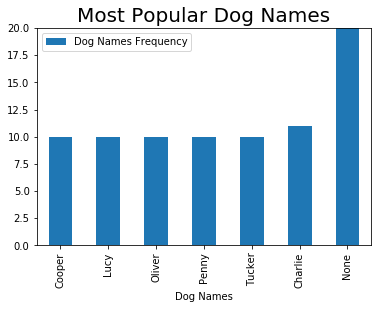

In [94]:
# Visualization representing the most popular dog names
dog_name = merge_copy.query('name == name')
dog_name_grouped = dog_name.groupby('name').count()[['tweet_id']]
dog_name_grouped.rename(columns={'tweet_id':'name_count'}, inplace=True)
dog_name_grouped.query('name_count >= 10').sort_values(by=['name_count']).plot.bar()
plt.ylim(top=20) 
plt.title("Most Popular Dog Names", {'fontsize' : 20})                                                 
plt.xlabel("Dog Names")
plt.legend(["Dog Names Frequency"]);



# Insight from visualization
For all the the dog names provided,
**Cooper, Lucy, Oliver, Penny, Tucker, and Charlie** were the most popular.



In [95]:
merge_copy.name.value_counts()

None         577
Charlie       11
Cooper        10
Lucy          10
Penny         10
Oliver        10
Tucker        10
Sadie          8
Lola           8
Bo             8
Winston        8
Daisy          7
Toby           7
Bella          6
Milo           6
Stanley        6
Koda           6
Scout          6
Bailey         6
Jax            6
Rusty          6
Dave           6
Louis          5
Oscar          5
Larry          5
Chester        5
Leo            5
Alfie          5
Buddy          5
Finn           4
            ... 
Milky          1
Raphael        1
Buckley        1
Humphrey       1
Evy            1
Pablo          1
Birf           1
BeBe           1
Striker        1
Steve          1
Fido           1
Ronduh         1
Malikai        1
Kloey          1
Farfle         1
Fletcher       1
Tanner         1
Amber          1
Rose           1
Cilantro       1
Trevith        1
Nida           1
Devón          1
Roscoe         1
Dwight         1
Tito           1
Staniel        1
Al            